# **TP3 : Object detection and tracking application

Script to train YOLOv8 model on a custom dataset (in terms of number of classes and object type)


import packages


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/107.7 GB disk)


To train a model, in this framework, we just need to use the commands from the ultralytics library (for information, they are based on Pytorch)

In YOLOv8, five different models are available for each category of detection, segmentation and classification. YOLOv8 Nano is the smallest and fastest model, while YOLOv8 Extra Large (YOLOv8x) is the slowest but most precise model.

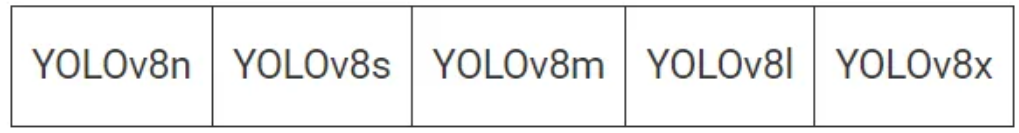

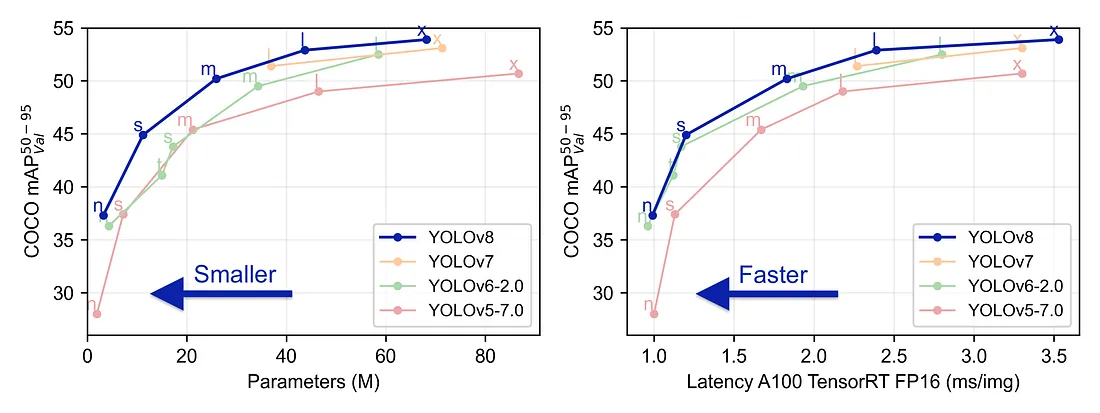



In [ ]:
# Load a model (ici n pour nano)
# model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)


PREPEREZ LE DATASET - créé par roboflow

In [ ]:
# Prepare dataset on your drive
from google.colab import drive
drive.mount('/content/drive')

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9XIQB2M4WAFRiEjuI3Ig")
project = rf.workspace("ball-detection-93mt5").project("tennisballsegmentation")
dataset = project.version(2).download("yolov8")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.193, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to TennisBallSegmentation-2 in yolov8:: 100%|██████████| 124/124 [00:00<00:00, 1831.57it/s]


And we train the model, we can change the training parameters to optimize performance (accuracy).

The list of arguments can be found here: [ultralytics documentation - training](https://docs.ultralytics.com/modes/train/#resuming-interrupted-trainings)

The results of each experiment are stored in the "runs" directory, there you will find the confusion matrices, validation results etc. (to explore, can be used for the report)

# **🏴** in case of error, modify data.yaml file with the absolute path to the train and val folders

**/content/**TennisBallSegmentation-2/data.yaml

In [ ]:
# change and check the datapath
import datetime

results = model.train (data='/content/TennisBallSegmentation-2/data.yaml', epochs = 25,imgsz=224)


Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/TennisBallSegmentation-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fal

RuntimeError: ignored

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/runs

Export the model

In [ ]:
#EXPORT
model.export()
# safe the model
!cp '/content/runs/detect/train8/weights/best.torchscript' '/content/drive/MyDrive/SE-5104A/tp'

Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

TorchScript: starting export with torch 2.0.1+cu118...
TorchScript: export success ✅ 1.7s, saved as 'yolov8n.torchscript' (12.5 MB)

Export complete (3.4s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolov8n.torchscript imgsz=640 data=coco.yaml  
Visualize:       https://netron.app
